### This notebook will be used for the Coursera Capstone Project to cluster the neighborhoods in Toronto


In [0]:
# Importing all the libraries
import requests
# !pip install beautifulsoup4
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors


2) Scraping table from following Wikipedia page using BeautifulSoup and transforming the data into dataframe:

https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M


In [545]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
ele_list = []
columns=['Postcode','Borough','Neighborhood']
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
table = soup.find('table',attrs={'class':'wikitable'})
table_body = table.tbody
rows = table_body.find_all('tr')
for row in rows:
  cols = row.find_all('td')
  if(len(cols)!=0):
    cells = [col.text.strip() for col in cols]
    ele_list.append([ele for ele in cells])
df = pd.DataFrame(ele_list, columns=columns)
df.head()

,Postcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


Ignoring cells with a borough that is Not assigned

In [546]:
df = df[df['Borough']!='Not assigned']
df.reset_index(drop=True,inplace=True)
df

,Postcode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,Lawrence Heights
4,M6A,North York,Lawrence Manor
5,M7A,Queen's Park,Not assigned
6,M9A,Downtown Toronto,Queen's Park
7,M1B,Scarborough,Rouge
8,M1B,Scarborough,Malvern
9,M3B,North York,Don Mills North


Merging Two or more neighborhood with same postcode into one column

In [547]:
df=df.groupby(['Postcode','Borough'])['Neighborhood'].apply(', '.join).reset_index()
df

,Postcode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


Assigning neighborhood same as the borough where cell is having borough but Not assigned neighborhood.

In [0]:
df.Neighborhood[df.Neighborhood=='Not assigned']=df.Borough[df.Neighborhood=='Not assigned']


Checking no of rows in the data frame

In [549]:
print("No of Rows are {}".format(df.shape[0]))

No of Rows are 103


Reading PostCodes from Geospatial_Coordinates.csv

In [550]:
postalCodeDF = pd.read_csv("https://raw.githubusercontent.com/arora-raghav/Coursera_Capstone/master/Geospatial_Coordinates.csv")
postalCodeDF.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Merging Two Dataframes to get the required columns

In [551]:
postalCodeDF = postalCodeDF.rename(columns = {'Postal Code':'Postcode'})
postalCodeDF
df = df.merge(postalCodeDF, how='left',on='Postcode')
df

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


Filtering data frame with Borough contains *Toronto*

In [0]:
# toronto_data = df[df.Borough.str.contains('Toronto')].reset_index(drop=True)
# toronto_data.sort_values('Neighborhood').reset_index(drop=True)

Fetching Longitude and Latitude for Toronto Ontario using geopy

In [553]:
toronto_data['Neighborhood'].unique().shape

(39,)

In [554]:
from geopy.geocoders import Nominatim
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 43.653963, -79.387207.


Visualizing all the neighborhood in Toronto

In [555]:
import folium
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Will be using foursquare api to get venues. Hence, initalizing Client_id and Client_secret variable 

In [556]:
CLIENT_ID = 'SR2I1GJJR0O0XHCEH5LFSKBS53ANL00ZVIS2DOYCO5NOQGDK' # your Foursquare ID
CLIENT_SECRET = 'KWGQ3I4U1BDGIEOXUHDR5QRVJMGWUJZG5QZI5NPI2Q4IQOTA' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SR2I1GJJR0O0XHCEH5LFSKBS53ANL00ZVIS2DOYCO5NOQGDK
CLIENT_SECRET:KWGQ3I4U1BDGIEOXUHDR5QRVJMGWUJZG5QZI5NPI2Q4IQOTA


Function that extracts the category of the venue


In [0]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Function that fetches the defined no of venues using latitude and longitude

In [0]:
def getNearbyVenues(names, latitudes, longitudes, radius=700, LIMIT=200):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            "4bf58dd8d48988d1e0931735",
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # print(results)
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [559]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )
toronto_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,The Remarkable Bean,43.672801,-79.287038,Coffee Shop
1,The Beaches,43.676357,-79.293031,Pippins Tea Company,43.670992,-79.295905,Tea Room
2,The Beaches,43.676357,-79.293031,Juice and Java,43.671062,-79.295755,Café
3,The Beaches,43.676357,-79.293031,Dip 'n Sip,43.678897,-79.297745,Coffee Shop
4,The Beaches,43.676357,-79.293031,Prana Coffee,43.671306,-79.294092,Coffee Shop
...,...,...,...,...,...,...,...
1257,"Runnymede, Swansea",43.651571,-79.484450,Golden Gecko Coffee,43.655970,-79.487340,Café
1258,Business Reply Mail Processing Centre 969 Eastern,43.662744,-79.321558,Starbucks,43.659600,-79.328277,Coffee Shop
1259,Business Reply Mail Processing Centre 969 Eastern,43.662744,-79.321558,Starbucks,43.659720,-79.328256,Coffee Shop
1260,Business Reply Mail Processing Centre 969 Eastern,43.662744,-79.321558,Starbucks,43.660964,-79.328324,Coffee Shop


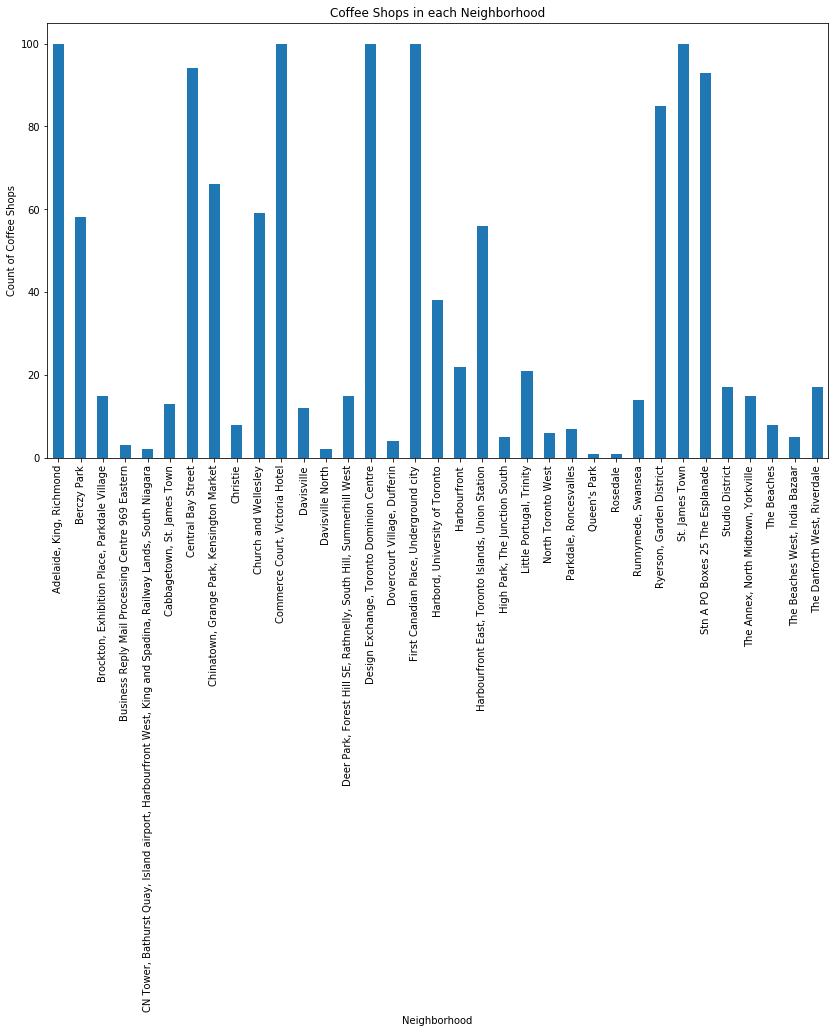

In [560]:
toronto_venues.Neighborhood.unique().shape
ff=toronto_venues.groupby('Neighborhood')['Venue']
ff.count().sort_values().to_frame()

ff.count().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Coffee Shops in each Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Count of Coffee Shops")
plt.show()


Getting venues using getNearbyVenues Function

####Analyze Each Neighborhood

In [561]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = (toronto_onehot.columns)
toronto_onehot = toronto_onehot[fixed_columns]
toronto_onehot.head()

,1 hour cafe,521 Café,7 West Cafe,808 Social,9bars,AGO Espresso Bar,AMPM Coffee,Absolute Cafe,Amausaan Uji Matcha,Antikka -Cafe & Records,Arena Coffee Bar,Aroma Espresso Bar,Arvo,Aspetta Caffe,Astarté Fresh Yogurt Bar,Average Joe's Cafe,B Espresso Bar,Baka Gallery Cafe,Balzac's Coffee,Balzac’s Coffee,Balzac’s Coffee Roasters,Bicerin Coffee,Black Bear Espresso,Bluestone Lane,Bluestone Lane Queen Station Coffee Shop,Bob Coffee Bar,Boxcar Social,Bread and Roses Bakery Cafe,Broadview Espresso,Bu'na,Bubbletease,Bulldog On The Block,Buro 53 Coffee Shop,CUBE,Cabbagetown Brew,Cafe Frappe,Cafe La Gaffe,Cafe Landwer,Cafe M,Cafe Neon,Cafe Nicole,Cafe Novo,Cafe Olya,Cafe On Harbord,Cafe Plenty,Cafe Reznikoff,Cafe Supreme,Cafe de Melbourne,CafeAGO,Caffe Furbo,Café AC,Café Pamenar,Café Plenty,Capital Espresso And Pastries,Carafted Bean,Casa Acoreana,Casa Coffee,Casa Loma Liberty Caffé,Chai Bar,Church Street Espresso,Citizenry,Cocoberry Cafe,Coffee Culture,Coffee Dak Lak,Coffee Exchange,Coffee Island,Coffee Public,Coffee Time,Coffee Tree Roastery,Coffee and All That Jazz,College Station Cafe,Contra Cafe,Cool Hand of a Girl,Country Style,Creeds Coffee Bar,Crepe & Co.,Crepe It Up,Crimson Teas 堅信良茶,Croissant Tree,Cuppa Tea,DAVIDsTEA,DT Bistro,Daily Perk,Dark Horse Espresso Bar,De Mello Palheta Coffee Roasters,Deer Cha,Delica Kitchen,Diabolos',Dineen @CommerceCourt,Dineen Coffee,Dip 'n Sip,Dish Cooking Studio,Dovercourt Cafe,Drake Cafe,E-Tea,Early Bird,Early Bird Espresso & Brew Bar,Easy Drink Easy Go,El Almacen Yerba Mate Cafe + Gallery,Elchi Chai Shop,Ella's Uncle,Espresso Etc,Euro Crepe Cafe,Everyday Gourmet (Teas & Coffees),Extra Butter,Ezra's Pound,FIKA Cafe,FUEL+,Faema Caffe,Fahrenheit Coffee,Fantail,First And Last Coffee Shop,First Break Coffee Shop,Flying Pony,Fresh Start Coffee Co.,Full Of Beans,Full Stop,Gloria Cafe,Goat Coffee Co.,Golden Gecko Coffee,Good Earth Coffeehouse,Grange house,Green Grotto 綠的小窩,Hailed Coffee,Hanabusa Cafe,Harbour Bar,Haute Coffee,Hestia,Hi Tea,Hillside Cafe & Bakery,Himalayan Java,Home Coffee Solutions,Hopper Coffee,Hot Box Cafe,HotBlack Coffee,Hotbox Cafe,Hotspot Cafe,I Deal Coffee,Icha Tea 一茶間,InCha 印茶,Infuse Cafe,Innis Cafe,Iron Rose Tea Gallery,Istanbul Cafe & Espresso Bar,It's Jenny Café,JJ Bean,Java Joe's,Java Joe's Village Cafe,Jetfuel Coffee,Jimmy's Coffee,Joker Cafe,Juice and Java,Kelly Cafe,Kensington Cafe,Kensington's,Koffea,L'Espresso Bar Mercurio,La Barista Café,La Bohème,Latte Mei 奶蓋咩,Lavazza Espression,Lazy Daisy's Cafe,Le Gourmand Café,Leonidas Chocolates Cafe,Lettieri,Lettieri Espresso Bar,Lettieri Espresso Bar + Cafe,Liberty Village Market and Cafe,Light Café 路燈咖啡,Lit Espresso Bar,Lite Bite,Little Pebbles,Livelihood Cafe,Louie Craft Coffee,Luis Coffee Shop,M Square Coffee Co,Maman,Manic Coffee,Marvel Coffee Co.,Mast Coffee,Matcha,McCafe,McCafe (Exchange Tower),McCafé,Meow Cat Cafe,Mercury Espresso Bar,Merryberry Cafe + Bistro,Michel's Baguette,Milky’s,Mio Express,Mio RistoBar,Mmmuffins,Modo Fruit and Tea House,Mos Mos,Mos Mos Coffee,MountainView Fare trade Coffee,Movenpick Cafe,NC Salon Dundas,NEO COFFEE BAR,NOW Lounge,Naomi,Natrel Milk Bar,Neo Coffee Bar,Nespresso Boutique at The Bay,Nordstrom Ebar,ODIN Cafe + Bar,OMG On The Park,Oakham Café,Oliva,Ooh-La-La Wholesome Eats,Oscar Coffee and Espresso Bar,Our Spot,Page One Cafe,Pavillion Coffee,Phoenix Café,Piedmont Coffee Bar,Pilot Coffee Roasters,Pippins Tea Company,Plentea Tea Bar,Pop Coffee Works,Prana Coffee,Presotea,Presse Cafe,Presse Café,Purple Penguin Cafe,Rapido,Red Eye Espresso,Red Fish Blue Fish Creative Cafe,Red Rocket Coffee,Remarkable Bean Leslieville,Reunion Island Coffee Bar,Rialto Espresso Bar,RiverRock Cafe,Rogers Radio Cafe (2nd Floor),Rooster Coffee,Rooster Coffee House,Sage Cafe & Catering,Salt & Pepper Catering Co,Sam James Coffee Bar,Sam James Coffee Bar (SJCB),Samadhi Tea House,Savoury Grounds,Say Tea,Scout and Cash Caffe,Second Cup,Second Cup (In St. Michael's),Second Cup (Miles Nadal JCC Fitness),Second Cup Coffee Co.

#### Let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [562]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped[toronto_grouped['Neighborhood']=="Queen's Park"].T


,24
Neighborhood,Queen's Park
1 hour cafe,0
521 Café,0
7 West Cafe,0
808 Social,0
9bars,0
AGO Espresso Bar,0
AMPM Coffee,0
Absolute Cafe,0
Amausaan Uji Matcha,0


Function to sort the venues in descending order.

In [0]:
def return_most_common_venues(row, num_top_venues):
    venues_list = []
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    for i in range(num_top_venues):
      venues_list.append(row_categories_sorted.index.values[i]) if row_categories_sorted[i]>0 else venues_list.append(None)
    return np.array(venues_list)
    # return row_categories_sorted.index.values[0:num_top_venues]

# return_most_common_venues(toronto_grouped.iloc[0, :], 10)

 Displaying the top 10 venues for each neighborhood.

In [564]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
  neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Tim Hortons,Starbucks,Second Cup,Timothy's World Coffee,Aroma Espresso Bar,DAVIDsTEA,Sam James Coffee Bar (SJCB),Second Cup Coffee Co.,Tim Horton's,Nordstrom Ebar
1,Berczy Park,Starbucks,Tim Hortons,Second Cup,DAVIDsTEA,Croissant Tree,Aroma Espresso Bar,Lavazza Espression,The Poet Cafe,Timothy's World Coffee,Everyday Gourmet (Teas & Coffees)
2,"Brockton, Exhibition Place, Parkdale Village",Starbucks,Naomi,Bu'na,Capital Espresso And Pastries,Plentea Tea Bar,Liberty Village Market and Cafe,The Roastery Cafe,Uma Cafe,The Abbott,Louie Craft Coffee
3,Business Reply Mail Processing Centre 969 Eastern,Starbucks,None,None,None,None,None,None,None,None,None
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Aroma Espresso Bar,Balzac’s Coffee Roasters,None,None,None,None,None,None,None,None



---



Finding the optimal value of K for clustering. To do that, we are using Silhouette Coefficient

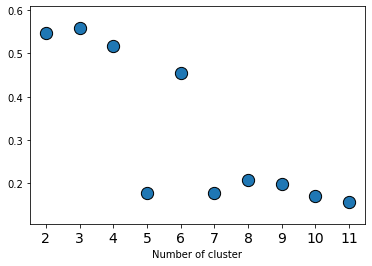

In [565]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
scores=[]
for k in range(2,12):
  kmeans = KMeans(n_clusters=k,random_state=0)
  preds = kmeans.fit_predict(toronto_grouped.drop('Neighborhood',axis=1))
  centers = kmeans.cluster_centers_
  score = silhouette_score(toronto_grouped.drop('Neighborhood',axis=1), preds)
  scores.append(score)

plt.figure()
plt.scatter(x=[i for i in range(2,12)],y=scores,s=150,edgecolor='k')
plt.xlabel("Number of cluster")
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.show()


Run *k*-means to cluster the neighborhood into 3 clusters.




In [566]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 3
labels= []
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
labels = kmeans.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Dataframe that includes the cluster as well as the top 10 venues for each neighborhood

In [569]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
toronto_merged = toronto_data
# # # # merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.merge(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
toronto_merged.head(35) # check the last columns!

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,1,Pippins Tea Company,Savoury Grounds,Prana Coffee,Juice and Java,The Remarkable Bean,Absolute Cafe,Oscar Coffee and Espresso Bar,Dip 'n Sip,None,None
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,1,Starbucks,Tim Hortons,Marvel Coffee Co.,Second Cup,Cafe Frappe,Euro Crepe Cafe,Broadview Espresso,Bread and Roses Bakery Cafe,Timothy's World Coffee,Si Espresso Bar
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,1,Country Style,Lazy Daisy's Cafe,Flying Pony,Starbucks,None,None,None,None,None,None
3,M4M,East Toronto,Studio District,43.659526,-79.340923,1,RiverRock Cafe,Starbucks,The Dock On Queen,First Break Coffee Shop,The Hub,Tertulia,Te Aro,Mercury Espresso Bar,Tango Palace Coffee Company,Sweat & Soda
4,M4P,Central Toronto,Davisville North,43.712751,-79.390197,1,Istanbul Cafe & Espresso Bar,The Social Blend,None,None,None,None,None,None,None,None
5,M4R,Central Toronto,North Toronto West,43.715383,-79.405678,1,La Bohème,De Mello Palheta Coffee Roasters,Second Cup,Tim Hortons,Himalayan Java,Starbucks,None,None,None,None
6,M4S,Central Toronto,Davisville,43.704324,-79.388790,1,Timothy's World Coffee,Istanbul Cafe & Espresso Bar,JJ Bean,Tim Hortons,Hillside Cafe & Bakery,Thobors Boulangerie Patisserie Café,Starbucks,Meow Cat Cafe,The Social Blend,Tim Hortons / Esso
7,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049,1,Starbucks,Tim Hortons,Second Cup,Country Style,Timothy's World Coffee,Presse Café,JJ Bean,Aroma Espresso Bar,DAVIDsTEA,La Barista Café
8,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,2,Home Coffee Solutions,None,None,None,None,None,None,None,None,None
9,M4X,Downtown Toronto,"Cabbagetown, St. James Town",43.667967,-79.367675,1,Tim Hortons,Tim Hortons / Esso,Cafe Olya,Merryberry Cafe + Bistro,Country Style,Red Rocket Coffee,Jetfuel Coffee,Staij & Co Café and Pastry Boutique,Cabbagetown Brew,It's Jenny Café


Visualizing resulting clusters

In [570]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters


Examining each cluster and determine the discriminating venue categories that distinguish each cluster.

###**Cluster 1**

In [571]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,Queen's Park,0,Java Joe's Village Cafe,None,None,None,None,None,None,None,None,None


###**Cluster 2**

In [572]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,The Beaches,1,Pippins Tea Company,Savoury Grounds,Prana Coffee,Juice and Java,The Remarkable Bean,Absolute Cafe,Oscar Coffee and Espresso Bar,Dip 'n Sip,None,None
1,"The Danforth West, Riverdale",1,Starbucks,Tim Hortons,Marvel Coffee Co.,Second Cup,Cafe Frappe,Euro Crepe Cafe,Broadview Espresso,Bread and Roses Bakery Cafe,Timothy's World Coffee,Si Espresso Bar
2,"The Beaches West, India Bazaar",1,Country Style,Lazy Daisy's Cafe,Flying Pony,Starbucks,None,None,None,None,None,None
3,Studio District,1,RiverRock Cafe,Starbucks,The Dock On Queen,First Break Coffee Shop,The Hub,Tertulia,Te Aro,Mercury Espresso Bar,Tango Palace Coffee Company,Sweat & Soda
4,Davisville North,1,Istanbul Cafe & Espresso Bar,The Social Blend,None,None,None,None,None,None,None,None
5,North Toronto West,1,La Bohème,De Mello Palheta Coffee Roasters,Second Cup,Tim Hortons,Himalayan Java,Starbucks,None,None,None,None
6,Davisville,1,Timothy's World Coffee,Istanbul Cafe & Espresso Bar,JJ Bean,Tim Hortons,Hillside Cafe & Bakery,Thobors Boulangerie Patisserie Café,Starbucks,Meow Cat Cafe,The Social Blend,Tim Hortons / Esso
7,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",1,Starbucks,Tim Hortons,Second Cup,Country Style,Timothy's World Coffee,Presse Café,JJ Bean,Aroma Espresso Bar,DAVIDsTEA,La Barista Café
9,"Cabbagetown, St. James Town",1,Tim Hortons,Tim Hortons / Esso,Cafe Olya,Merryberry Cafe + Bistro,Country Style,Red Rocket Coffee,Jetfuel Coffee,Staij & Co Café and Pastry Boutique,Cabbagetown Brew,It's Jenny Café
10,Church and Wellesley,1,Tim Hortons,Second Cup,Starbucks,Presse Cafe,DAVIDsTEA,Aroma Espresso Bar,Buro 53 Coffee Shop,Timothy's World Coffee,Black Bear Espresso,Coffee Public


###**Cluster 3**

In [573]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Rosedale,2,Home Coffee Solutions,None,None,None,None,None,None,None,None,None
